In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
from fiona.crs import from_epsg

In [2]:
map_path=r"M:\NY4P Metrics Research 18034\05_GRAPHICS\Maps"
graph_path= r"M:\NY4P Metrics Research 18034\05_GRAPHICS\Charts Graphs Diagrams"

# load data

In [3]:
cbs= gpd.read_file(r"S:\NYC_GIS_DATA\community districts\nycd.shp")

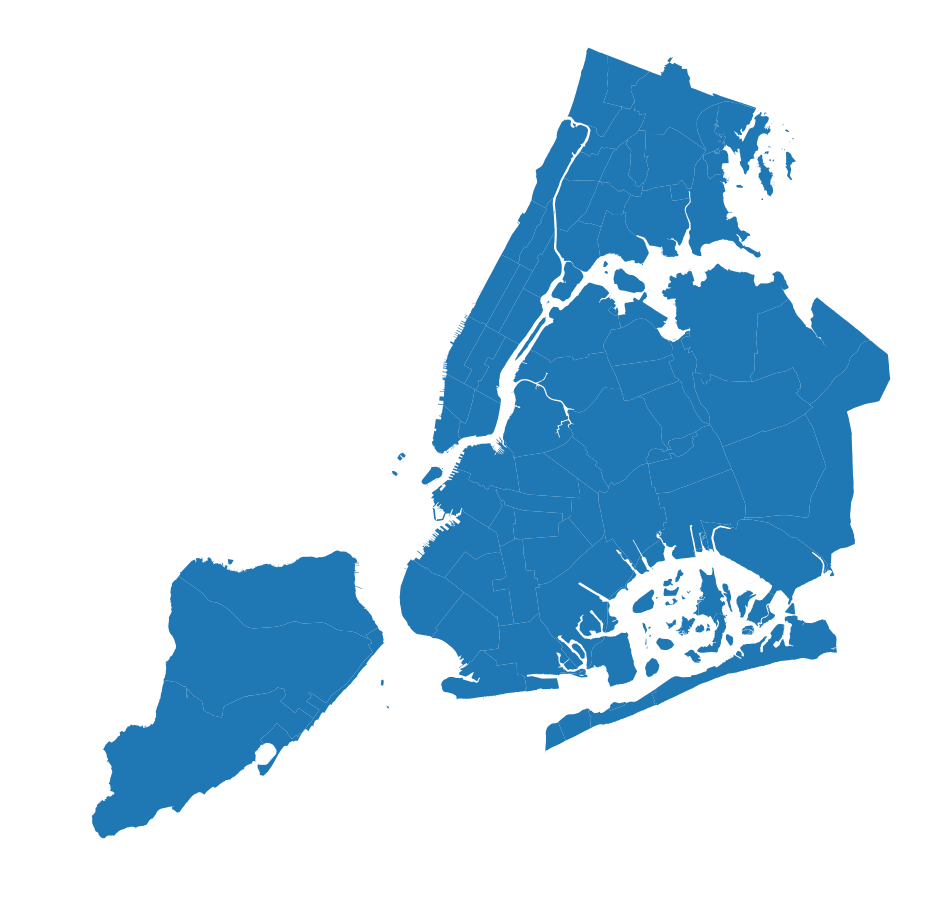

In [4]:
cbs.plot(figsize=(16,16))
plt.axis('off')
plt.show();
cbs.crs;

In [5]:
ntas= gpd.read_file(r"S:\NYC_GIS_DATA\DCP Neighborhood Tabulation Areas\nynta.shp")

In [6]:
path_parks= r'M:\NY4P Metrics Research 18034\03_GIS+ANALYSIS\01_DATA\RAW\Parks Events Listing\190513_download'

In [7]:
event= pd.read_csv(join(path_parks, 'NYC_Parks_Events_Listing___Event_Listing.csv'))
orgs= pd.read_csv(join(path_parks, 'NYC_Parks_Events_Listing___Event_Organizers.csv'))
loc= pd.read_csv(join(path_parks, 'NYC_Parks_Events_Listing___Event_Locations.csv'))
cats= pd.read_csv(join(path_parks, 'NYC_Parks_Events_Listing___Event_Categories.csv'))

# exploration

In [8]:
event.columns

Index(['event_id', 'title', 'date', 'start_time', 'end_time',
       'location_description', 'description', 'snippet', 'phone', 'email',
       'cost_free', 'cost_description', 'must_see', 'url', 'notice'],
      dtype='object')

In [9]:
len(event['event_id'].unique())

74880

In [10]:
len(event)

74880

In [11]:
event['date']= pd.to_datetime(event['date'], format='%m/%d/%Y')
event['date'].head(15)

0    2013-10-29
1    2017-08-19
2    2017-04-22
3    2018-08-30
4    2018-05-06
5    2013-12-17
6    2014-08-13
7    2014-11-26
8    2017-09-23
9    2018-05-13
10   2018-05-20
11   2016-10-01
12   2015-08-18
13   2018-09-25
14   2015-09-23
Name: date, dtype: datetime64[ns]

In [12]:
print(cats['name'].value_counts())

Best for Kids                                          23280
Nature                                                 20432
Fitness                                                18705
Education                                              17052
Art                                                    16199
Seniors                                                11970
History                                                11965
Tours                                                  10663
Accessible                                              9903
Sports                                                  8731
Arts & Crafts                                           8486
Volunteer                                               8217
Outdoor Fitness                                         7859
Waterfront                                              6238
Historic House Trust Sites                              5610
Games                                                   5472
Festivals               

In [13]:
len(cats['name'].unique())

126

In [14]:
len(cats['event_id'].unique()) #unique events

91715

In [15]:
len(cats) #repeated events

270353

In [16]:
pd.merge(event, cats, how='inner', on='event_id')

,event_id,title,date,start_time,end_time,location_description,description,snippet,phone,email,cost_free,cost_description,must_see,url,notice,name
0,76690,Open Hours: Hallett Nature Sanctuary,2013-10-29,13:00,15:00,NaN,Normally closed to visitors except on guided t...,Normally closed to visitors except on guided t...,(212) 360-1461,hlook@centralparknyc.org,1,NaN,0,open-hours-hallett-nature-sanctuary,0,Nature
1,149886,Paper Arts and Crafts,2017-08-19,14:00,15:30,NaN,"<p>Make beautiful, fun things out of paper to ...","Make beautiful, fun things out of paper to giv...",(718) 365-5516,Lucy.Aponte@parks.nyc.gov,1,NaN,0,paper-arts-and-crafts,0,Arts & Crafts
2,149886,Paper Arts and Crafts,2017-08-19,14:00,15:30,NaN,"<p>Make beautiful, fun things out of paper to ...","Make beautiful, fun things out of paper to giv...",(718) 365-5516,Lucy.Aponte@parks.nyc.gov,1,NaN,0,paper-arts-and-crafts,0,Best for Kids
3,149886,Paper Arts and Crafts,2017-08-19,14:00,15:30,NaN,"<p>Make beautiful, fun things out of paper to ...","Make beautiful, fun things out of paper to giv...",(718) 365-5516,Lucy.Aponte@parks.nyc.gov,1,NaN,0,paper-arts-and-crafts,0,Historic House Trust Sites
4,149886,Paper Arts and Crafts,2017-08-19,14:00,15:30,NaN,"<p>Make beautiful, fun things out of paper to ...","Make beautiful, fun things out of paper to giv...",(718) 365-5516,Lucy.Aponte@parks.nyc.gov,1,NaN,0,paper-arts-and-crafts,0,Poe Park Visitor Center
5,143835,It's My Park at Herbert Von King Park - Spring...,2017-04-22,08:00,12:00,NaN,<p>Please note: this event time was originally...,Volunteers will spruce up playground equipment...,(917) 297-2365,wmdkaos@aol.com,1,NaN,0,its-my-park-at-herbert-von-king-park-spring-cl...,0,Volunteer
6,143835,It's My Park at Herbert Von King Park - Spring...,2017-04-22,08:00,12:00,NaN,<p>Please note: this event time was originally...,Volunteers will spruce up playground equipment...,(917) 297-2365,wmdkaos@aol.com,1,NaN,0,its-my-park-at-herbert-von-king-park-spring-cl...,0,It's My Park
7,162696,Summer on the Hudson: Yoga Flow,2018-08-30,18:30,19:30,NaN,<p>Link mindful breath with movement in this f...,Link mindful breath with movement in this full...,311,summeronthehudson@gmail.com,1,NaN,0,summer-on-the-hudson-yoga-flow,0,Fitness
8,162696,Summer on the Hudson: Yoga Flow,2018-08-30,18:30,19:30,NaN,<p>Link mindful breath with movement in this f...,Link mindful breath with movement in this full...,311,summeronthehudson@gmail.com,1,NaN,0,summer-on-the-hudson-yoga-flow,0,Outdoor Fitness
9,162696,Summer on the Hudson: Yoga Flow,2018-08-30,18:30,19:30,NaN,<p>Link mindful breath with movement in this f...,Link mindful breath with movement in this full...,311,summeronthehudson@gmail.com,1,NaN,0,summer-on-the-hudson-yoga-flow,0,Summer on the Hudson


In [17]:
# df.groupby('Name').resample('W-Mon', on='Date').sum().reset_index().sort_values(by='Date')

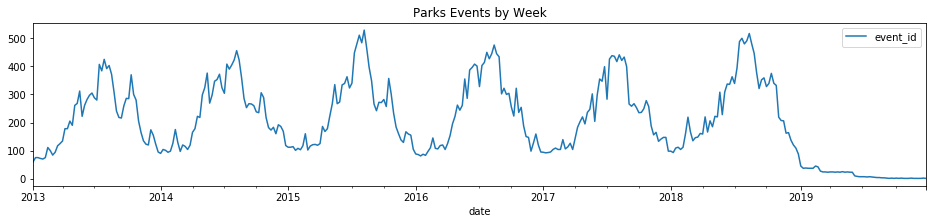

In [18]:
event.resample('W-Mon', on='date').agg({'event_id':'count'}).sort_values(by='date').plot(figsize=(16,3))
plt.title('Parks Events by Week') #Restrict park events by week to certain months -- only April to October?
plt.show();

### Weather

In [19]:
path_weather= r'M:\NY4P Metrics Research 18034\03_GIS+ANALYSIS\01_DATA\RAW\NOAA Weather\Daily Summaries'

In [20]:
w1= pd.read_csv(join(path_weather, '130101_151231.csv'))
w2= pd.read_csv(join(path_weather, '160101_190513.csv'))

C:\Users\Jennah\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (7,11,17,19,21,23,25,27,31,33,35,37,39,41,43,45,47,49,51,53,55,57,59,61,63) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Jennah\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (7,9,11,13,21,23,25,27,29,31,33,35,37,39,41,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [21]:
# w1.info()

In [22]:
# w1[(w1['TAVG'].notna())&(w1['STATION']=='USW00014732')][['STATION', 'NAME', 'DATE', 'TAVG']]

In [23]:
temps= \
pd.concat(    
    [w1[(w1['TAVG'].notna())&(w1['STATION']=='USW00014732')][['STATION', 'NAME', 'DATE', 'TAVG']],
     w2[(w2['TAVG'].notna())&(w2['STATION']=='USW00014732')][['STATION', 'NAME', 'DATE', 'TAVG']]],
    sort=False, ignore_index=True
)

In [24]:
temps['DATE']= pd.to_datetime(temps['DATE'], format='%Y-%m-%d')

In [25]:
temps.rename(columns={'DATE':'date'}, inplace=True)

In [26]:
temps.index= temps['date']

In [27]:
temps.drop('date', axis=1, inplace=True)

In [28]:
hist= event.resample('W-Mon', on='date').agg({'event_id':'count'}).sort_values(by='date').join(temps[['TAVG']])

Text(0.5, 1.0, 'Park Events per Week with Daily Average Temperature')

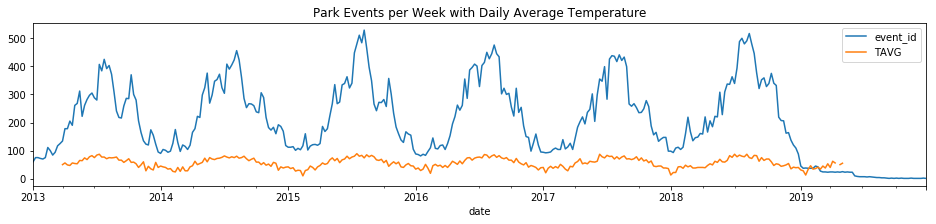

In [29]:
hist.plot(figsize=(16,3))
plt.title('Park Events per Week with Daily Average Temperature')

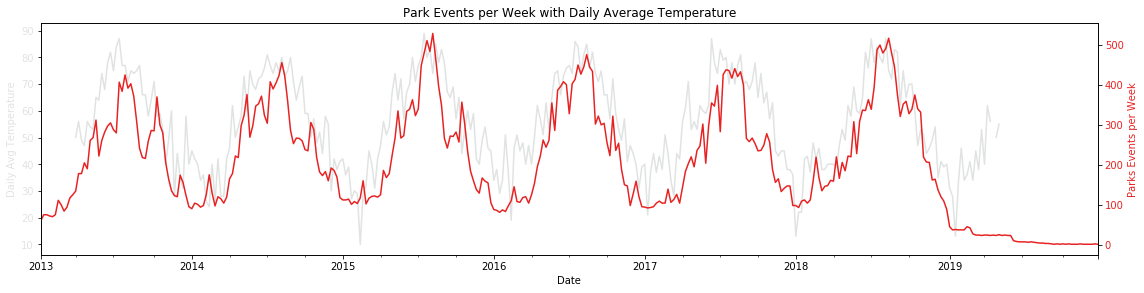

In [30]:
fig, ax1 = plt.subplots(figsize=(16,4))

color = '#E1E3E3'
ax1.set_ylabel('Daily Avg Temperature', color=color)
hist['TAVG'].plot(color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = '#E82222'
ax2.set_ylabel('Parks Events per Week', color=color)
hist['event_id'].plot(color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.set_xlabel('Date')

fig.tight_layout()
plt.title('Park Events per Week with Daily Average Temperature')
plt.show();

In [31]:
import datetime

In [32]:
hist2= hist.reset_index()

In [33]:
# masks
time_mask13= (hist2['date']>='2013-01-01')&(hist2['date']<'2014-01-01')
time_mask14= (hist2['date']>='2014-01-01')&(hist2['date']<'2015-01-01')
time_mask15= (hist2['date']>='2015-01-01')&(hist2['date']<'2016-01-01')
time_mask16= (hist2['date']>='2016-01-01')&(hist2['date']<'2017-01-01')
time_mask17= (hist2['date']>='2017-01-01')&(hist2['date']<'2018-01-01')
time_mask18= (hist2['date']>='2018-01-01')&(hist2['date']<'2019-01-01')

In [34]:
time_masks= [time_mask13,time_mask14,time_mask15,time_mask16,time_mask17,time_mask18]

In [35]:
hist2= \
pd.concat([hist2[m]['event_id'].reset_index(drop=True) for m in time_masks],
          axis=1, ignore_index=True, sort=False).drop(52)

In [36]:
hist2.columns= ['fy13', 'fy14', 'fy15', 'fy16', 'fy17', 'fy18']

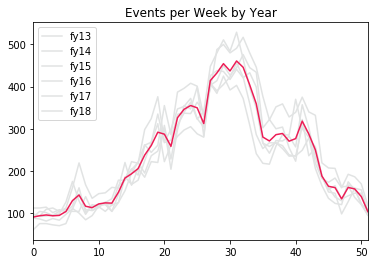

In [37]:
hist2.plot(color='#E1E3E3')
hist2.mean(axis=1).plot(color='#ED1D56')
plt.title('Events per Week by Year')
ax1.set_xlabel('Week')
plt.show()


### Categories

In [38]:
t= cats['event_id'].sample(1).iloc[0]

In [39]:
cats[cats['event_id']==t]

,event_id,name
151356,131763,Film
151357,131763,Best for Kids
151358,131763,Free Summer Movies
151359,131763,Movies Under the Stars


In [40]:
path_processed= r'M:\NY4P Metrics Research 18034\03_GIS+ANALYSIS\01_DATA\Processed'

In [41]:
#pd.DataFrame(cats['name'].unique(), columns=['Category']).to_excel(join(path_processed, r'Categories\event_categories.xlsx'))

In [42]:
majcats= pd.read_excel(join(path_processed, r'Categories\190513_Event_Categories.xlsx'))

In [43]:
cats2= pd.merge(cats, majcats, left_on='name', right_on='Category').drop('Category', axis=1)

In [44]:
df= pd.merge(event, cats2[['event_id', 'majcat']], on='event_id', how='left')
len(df)

216101

In [45]:
df= df[~df.duplicated()] #removes all duplicated rows
len(df)

142683

In [46]:
df[~df['event_id'].duplicated()].shape #74880 rows, 16 columns, only unique events

(74880, 16)

Text(0.5, 1.0, 'Repeating Events by Event ID')

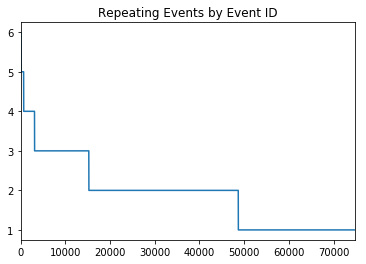

In [47]:
df['event_id'].value_counts().reset_index(drop=True).plot();
plt.title('Repeating Events by Event ID') #Note most events are repeating

In [48]:
test= df.groupby('majcat').event_id.value_counts()

Cultural and Education       46597
Misc Recreation              36358
Institutional Initiatives    26045
Sports and Fitness           20240
Unclassifiable                7361
Holiday or Seasonal           5671
Name: majcat, dtype: int64

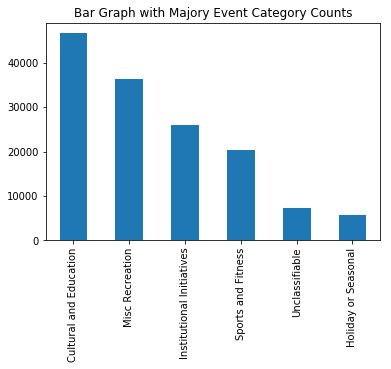

In [49]:
df['majcat'].value_counts().plot(kind='bar',title='Bar Graph with Majory Event Category Counts');
df['majcat'].value_counts()

In [50]:
uniqcat = df['majcat'].unique().tolist()
df.shape

(142683, 16)

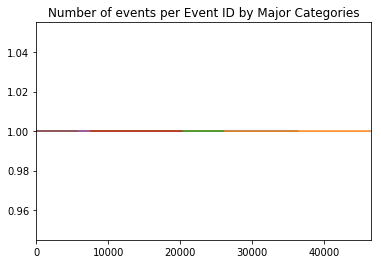

In [51]:
for i in range(len(uniqcat)-1):
    temp= df[df['majcat']==uniqcat[i]]
    temp['event_id'].value_counts().reset_index(drop=True).plot(title='Number of events per Event ID by Major Categories');
#There is no repetition when disaggregated by type of event.

In [52]:
event_counts= \
pd.DataFrame(df['event_id'].value_counts()).reset_index()\
    .rename(columns={'index':'event_id', 'event_id':'event_count'})
event_counts.head()

,event_id,event_count
0,144861,6
1,124964,6
2,125061,6
3,76375,6
4,124962,6


In [53]:
df2= pd.merge(df, event_counts, on='event_id', how='left')

In [54]:
unclass_ids= df2[(df2['majcat']=='Unclassifiable')&(df2['event_count']>1)].index

In [55]:
df3= df2.drop(unclass_ids)

In [56]:
df3[~df3['event_id'].duplicated()]['majcat'].value_counts()

Cultural and Education       32158
Misc Recreation              21265
Sports and Fitness           13839
Institutional Initiatives     5873
Holiday or Seasonal           1038
Unclassifiable                 296
Name: majcat, dtype: int64

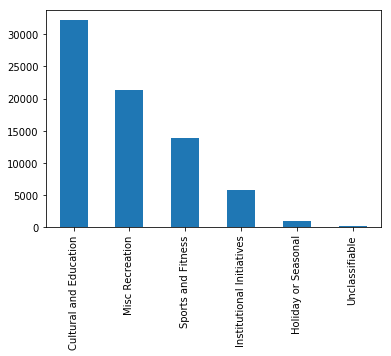

In [57]:
df3[~df3['event_id'].duplicated()]['majcat'].value_counts().plot(kind='bar');

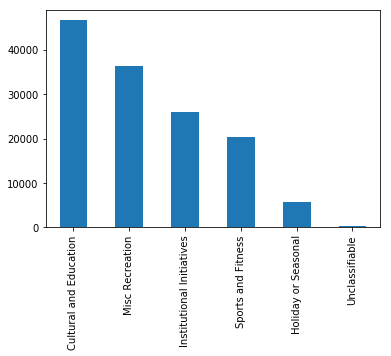

In [58]:
df3['majcat'].value_counts().plot(kind='bar');

In [59]:
df3.reset_index(drop=True, inplace=True)

In [60]:
hist3= df3.groupby('majcat').resample('W-Mon', on='date').agg({'majcat':'count'}).sort_values(by='date').unstack().T

In [61]:
hist3.columns
hist3.head()

majcat             Cultural and Education  Holiday or Seasonal  \
       date                                                      
majcat 2013-01-07                    28.0                  5.0   
       2013-01-14                    32.0                  2.0   
       2013-01-21                    43.0                  4.0   
       2013-01-28                    36.0                  4.0   
       2013-02-04                    36.0                  4.0   

majcat             Institutional Initiatives  Misc Recreation  \
       date                                                     
majcat 2013-01-07                       28.0             30.0   
       2013-01-14                       39.0             41.0   
       2013-01-21                       28.0             32.0   
       2013-01-28                       33.0             37.0   
       2013-02-04                       30.0             29.0   

majcat             Sports and Fitness  Unclassifiable  
       date                                            
majcat 2013-01-07                30.0             NaN  
       2013-01-14                28.0             NaN  
       2013-01-21                26.0             NaN  
       2013-01-28                20.0             NaN  
       2013-02-04                17.0             NaN

In [62]:
hist3.columns= ['Cultural and Education', 'Holiday or Seasonal',
       'Institutional Initiatives', 'Misc Recreation', 'Sports and Fitness',
       'Unclassifiable']

In [63]:
hist3= hist3.loc['majcat']

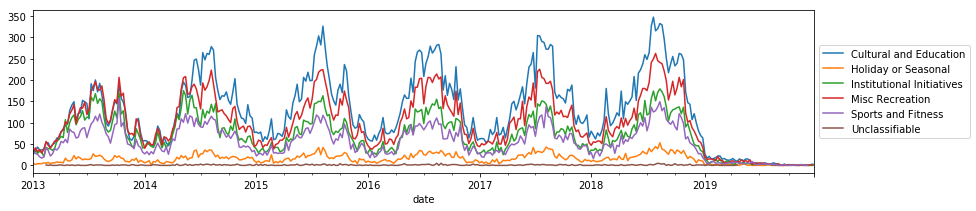

In [64]:
hist3.plot(figsize=(14,3))
plt.legend(loc='center left', bbox_to_anchor=(1,.5))
plt.show();

### Location

In [65]:
from shapely.geometry import Point

In [66]:
event2= pd.merge(event, loc, on='event_id', how='left')
event2.head()

,event_id,title,date,start_time,end_time,location_description,description,snippet,phone,email,...,url,notice,name,park_id,lat,long,address,zip,borough,accessible
0,76690,Open Hours: Hallett Nature Sanctuary,2013-10-29,13:00,15:00,NaN,Normally closed to visitors except on guided t...,Normally closed to visitors except on guided t...,(212) 360-1461,hlook@centralparknyc.org,...,open-hours-hallett-nature-sanctuary,0,Hallett Nature Sanctuary,M010,40.765701,-73.976097,NaN,NaN,M,1.0
1,149886,Paper Arts and Crafts,2017-08-19,14:00,15:30,NaN,"<p>Make beautiful, fun things out of paper to ...","Make beautiful, fun things out of paper to giv...",(718) 365-5516,Lucy.Aponte@parks.nyc.gov,...,paper-arts-and-crafts,0,Poe Park Visitor Center,X040,40.865002,-73.894699,2640 Grand Concourse,NaN,X,1.0
2,143835,It's My Park at Herbert Von King Park - Spring...,2017-04-22,08:00,12:00,NaN,<p>Please note: this event time was originally...,Volunteers will spruce up playground equipment...,(917) 297-2365,wmdkaos@aol.com,...,its-my-park-at-herbert-von-king-park-spring-cl...,0,Herbert Von King Cultural Arts Center,B088,40.689899,-73.946701,670 Lafayette Avenue,11216.0,B,1.0
3,162696,Summer on the Hudson: Yoga Flow,2018-08-30,18:30,19:30,NaN,<p>Link mindful breath with movement in this f...,Link mindful breath with movement in this full...,311,summeronthehudson@gmail.com,...,summer-on-the-hudson-yoga-flow,0,Lawn at 74th Street,M353,40.781961,-73.985494,NaN,NaN,M,1.0
4,164892,It's My Park at William Sheridan Playground,2018-05-06,10:00,14:00,NaN,"<p>This It&#39;s My Park season, volunteer wit...",Volunteer with Friends of William Sheridan to ...,NaN,delancey.nelson@parks.nyc.gov,...,its-my-park-at-william-sheridan-playground,0,William Sheridan Playground,B124,40.715062,-73.964118,NaN,NaN,B,NaN


In [67]:
len(loc)

95796

In [68]:
len(event)

74880

In [69]:
len(event2) #not every event is in all parks?

76526

In [70]:
event2['geometry']= [Point(p) for p in event2[['long', 'lat']].itertuples(index=False)]

In [71]:
event2= gpd.GeoDataFrame(event2, crs=from_epsg(2263))

In [72]:
event2.crs
event2.crs= from_epsg(4326)
event2263= event2.to_crs(epsg=2263)

In [274]:
latrange=[event2263['lat'].min(),event2263['lat'].max()]
longrange = [event2263['long'].min(),event2263['long'].max()]
event2263.index=event2263['lat']
event2263 = event2263.drop(latrange[1],axis=0)

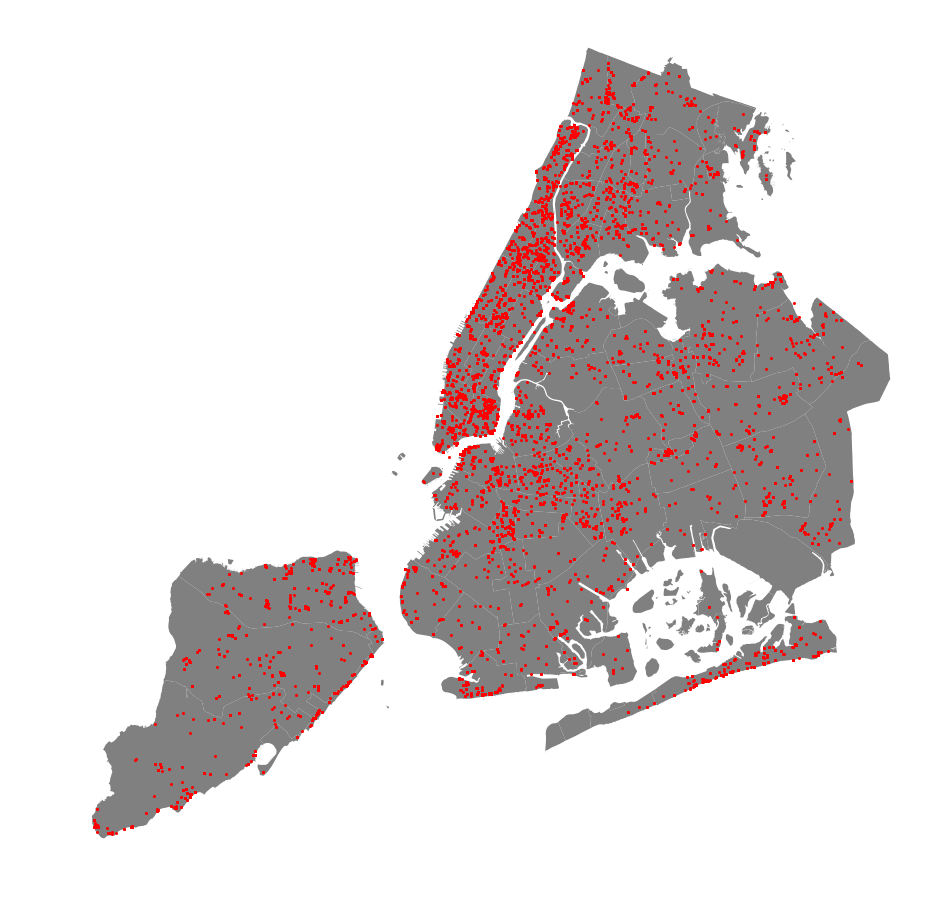

In [275]:
fig, ax = plt.subplots(1, figsize=(16,16))
base = cbs.plot(ax=ax, color='gray')
event2263.plot(ax=ax, color='red', markersize=4)
plt.axis('off')
plt.show();

In [276]:
event2['date']= event2['date'].astype(str)

In [73]:
#event2.to_file(join(path_processed, r'Mapped Events\park_events_190514_alldata.shp'))

In [77]:
event2263= event2263[~event2263['event_id'].duplicated()]

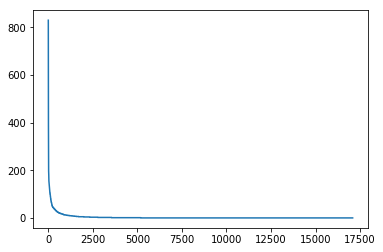

In [78]:
plt.plot(event2['title'].value_counts().values);

In [79]:
event2.head(1)

,event_id,title,date,start_time,end_time,location_description,description,snippet,phone,email,...,notice,name,park_id,lat,long,address,zip,borough,accessible,geometry
0,76690,Open Hours: Hallett Nature Sanctuary,2013-10-29,13:00,15:00,NaN,Normally closed to visitors except on guided t...,Normally closed to visitors except on guided t...,(212) 360-1461,hlook@centralparknyc.org,...,0,Hallett Nature Sanctuary,M010,40.765701,-73.976097,NaN,NaN,M,1.0,POINT (-73.97609710693359 40.76570129394531)


In [80]:
event2.shape

(76526, 24)

In [81]:
event2.crs

{'init': 'epsg:4326', 'no_defs': True}

In [82]:
cbs.crs

{'init': 'epsg:2263'}

In [83]:
event2['geometry'].head()

0    POINT (-73.97609710693359 40.76570129394531)
1     POINT (-73.89469909667969 40.8650016784668)
2    POINT (-73.94670104980469 40.68989944458008)
3        POINT (-73.985493659973 40.781961284289)
4        POINT (-73.964117906992 40.715061621068)
Name: geometry, dtype: object

In [84]:
event2263['geometry'].head()

0    POINT (990871.2821305585 218243.2837263702)
1     POINT (1013375.649317923 254438.582607902)
2    POINT (999031.0151938059 190629.9053739559)
3     POINT (988267.384874076 224166.7720662239)
4    POINT (994197.1683949503 199794.7780903989)
Name: geometry, dtype: object

In [85]:
test= gpd.sjoin(event2263, cbs, how='inner', op='within')

C:\Users\Jennah\AppData\Local\Continuum\anaconda3\lib\site-packages\geopandas\tools\sjoin.py:44: UserWarning: CRS of frames being joined does not match!
  warn('CRS of frames being joined does not match!')
C:\Users\Jennah\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:2167: RuntimeWarning: invalid value encountered in ? (vectorized)
  outputs = ufunc(*inputs)


In [86]:
len(test)

74305

In [87]:
cbs.head()

,BoroCD,Shape_Leng,Shape_Area,PUMA,geometry
0,311,51566.989012,1.031759e+08,4017.0,"POLYGON ((991748.3937988281 161084.9552001953,..."
1,480,45440.919364,3.272360e+07,NaN,"POLYGON ((1022267.307983398 218659.5328369141,..."
2,501,157923.967823,3.769631e+08,3903.0,(POLYGON ((939997.0946044922 173013.5794067383...
3,202,49604.473410,6.186001e+07,3710.0,(POLYGON ((1012821.805786133 229228.2645874023...
4,105,35287.621021,4.379674e+07,3807.0,"POLYGON ((991725.2442016602 217725.2991943359,..."


In [88]:
cbs2= pd.merge(cbs, test.groupby('BoroCD').agg({'event_id':'count'}).reset_index(), on='BoroCD')

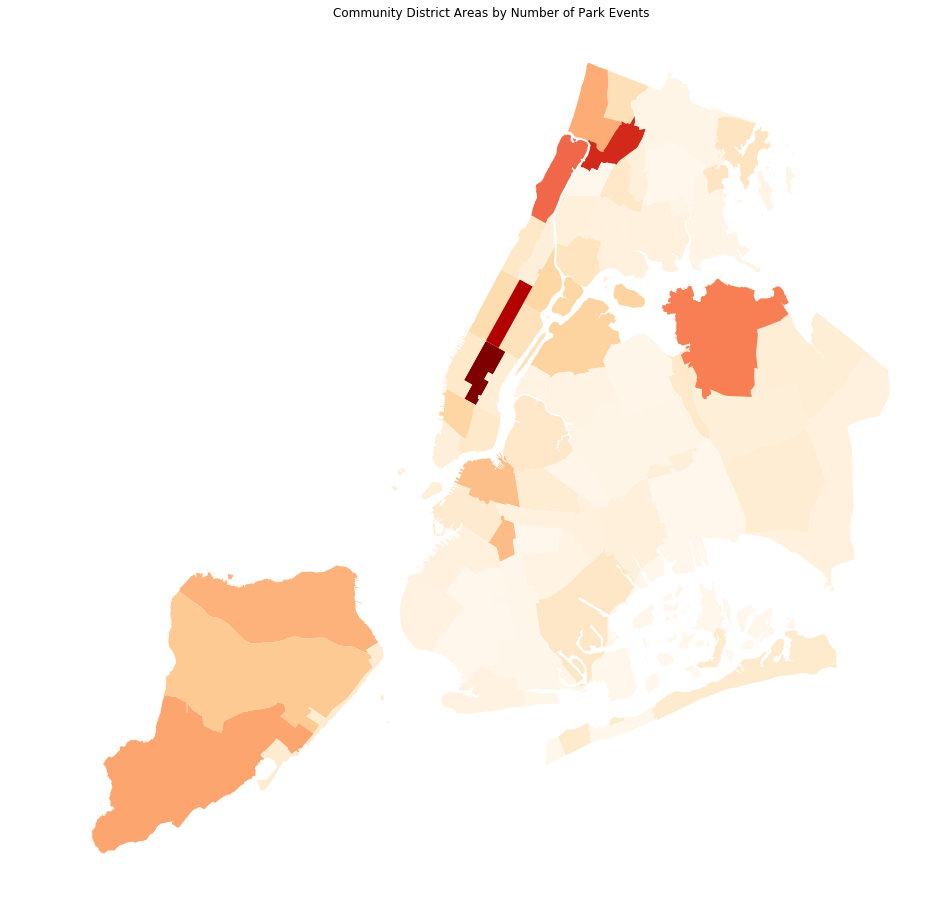

In [89]:
cbs2.plot('event_id', cmap='OrRd', figsize=(16,16))
plt.title('Community District Areas by Number of Park Events')
plt.axis('off')
plt.savefig(join(map_path,'cdsbyparkevents.pdf'))

In [90]:
test.columns

Index(['event_id', 'title', 'date', 'start_time', 'end_time',
       'location_description', 'description', 'snippet', 'phone', 'email',
       'cost_free', 'cost_description', 'must_see', 'url', 'notice', 'name',
       'park_id', 'lat', 'long', 'address', 'zip', 'borough', 'accessible',
       'geometry', 'index_right', 'BoroCD', 'Shape_Leng', 'Shape_Area',
       'PUMA'],
      dtype='object')

Number of Events per Park

In [91]:
test['park_id'].value_counts();

In [92]:
ntas= gpd.read_file(r"S:\NYC_GIS_DATA\DCP Neighborhood Tabulation Areas\nynta.shp")

In [93]:
test2= gpd.sjoin(event2263, ntas, how='inner', op='within')

In [94]:
ntasjoin= pd.merge(ntas,test2.groupby('NTACode').agg({"event_id":'count'}),on="NTACode")

In [95]:
ntasjoin.head()

,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape_Leng,Shape_Area,geometry,event_id
0,3,Brooklyn,047,BK43,Midwood,27996.591066,3.579964e+07,"POLYGON ((998870.8071899414 168503.1193847656,...",3
1,3,Brooklyn,047,BK75,Bedford,29992.918642,3.262983e+07,"POLYGON ((1000351.302612305 194574.900390625, ...",420
2,2,Bronx,005,BX40,Fordham South,15878.271905,6.307283e+06,"POLYGON ((1014295.119384766 253236.9890136719,...",10
3,3,Brooklyn,047,BK88,Borough Park,39247.228009,5.400502e+07,"POLYGON ((990897.9002075195 169268.1207885742,...",7
4,3,Brooklyn,047,BK96,Rugby-Remsen Village,30957.853428,3.270695e+07,"POLYGON ((1009623.354003906 176865.7595825195,...",183


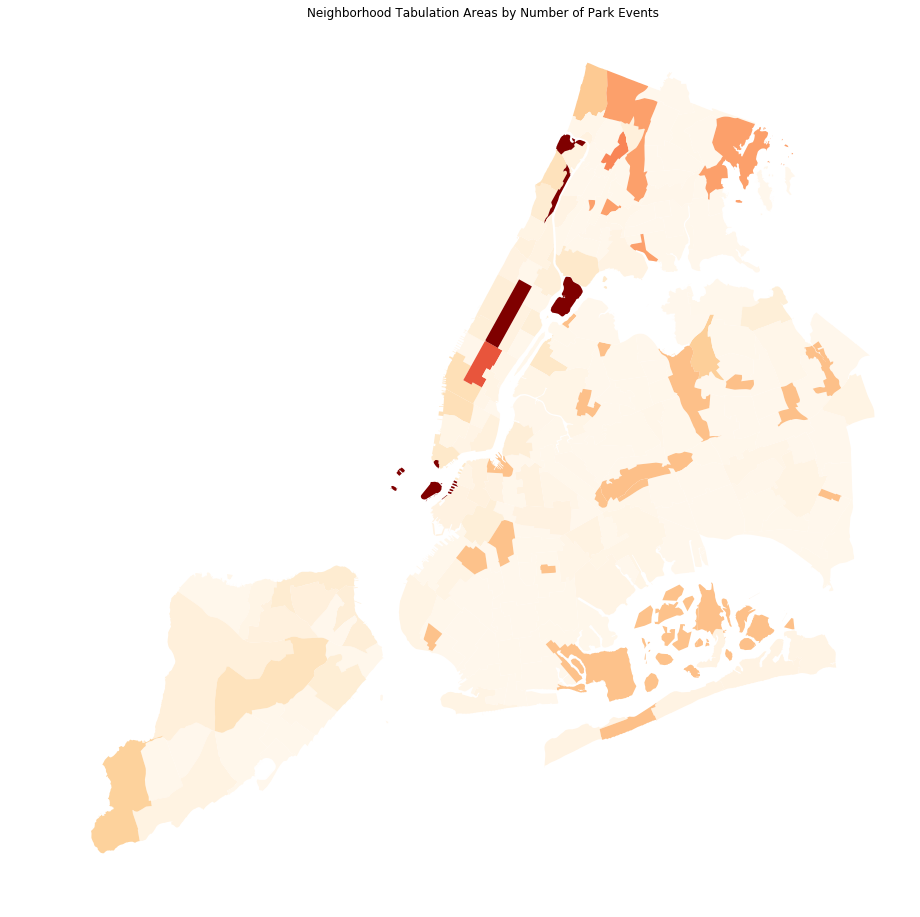

In [101]:
ntasjoin.plot('event_id', cmap='OrRd', figsize=(16,16))
plt.title('Neighborhood Tabulation Areas by Number of Park Events')
plt.axis('off')
plt.savefig(join(map_path,'ntasbyparkevents.pdf'));

In [102]:
parks= gpd.read_file(r"M:\NY4P Metrics Research 18034\03_GIS+ANALYSIS\01_DATA\RAW\NYC_PARKS_DATA\NYCPARKS_ALLSITES.shp")
parks['geometry'].head()
parks.index = parks['SIGNNAME']

(905609.3701171876, 1072055.6217041016, 112485.76063414462, 280480.4142594696)

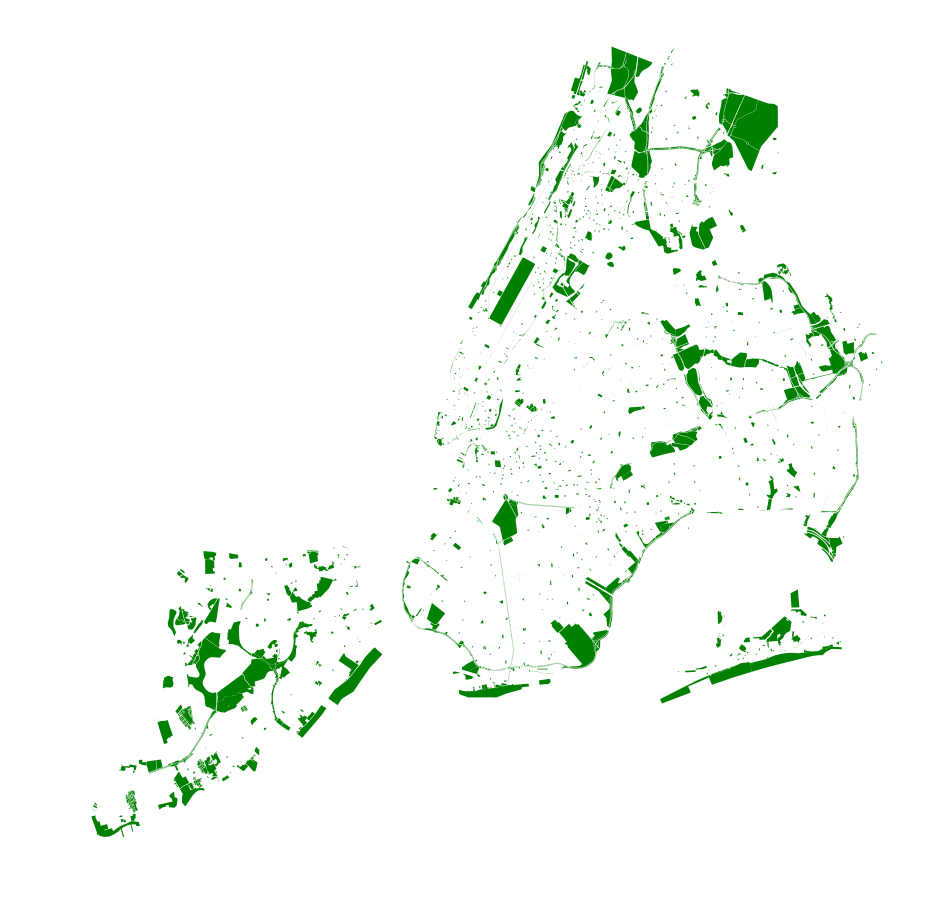

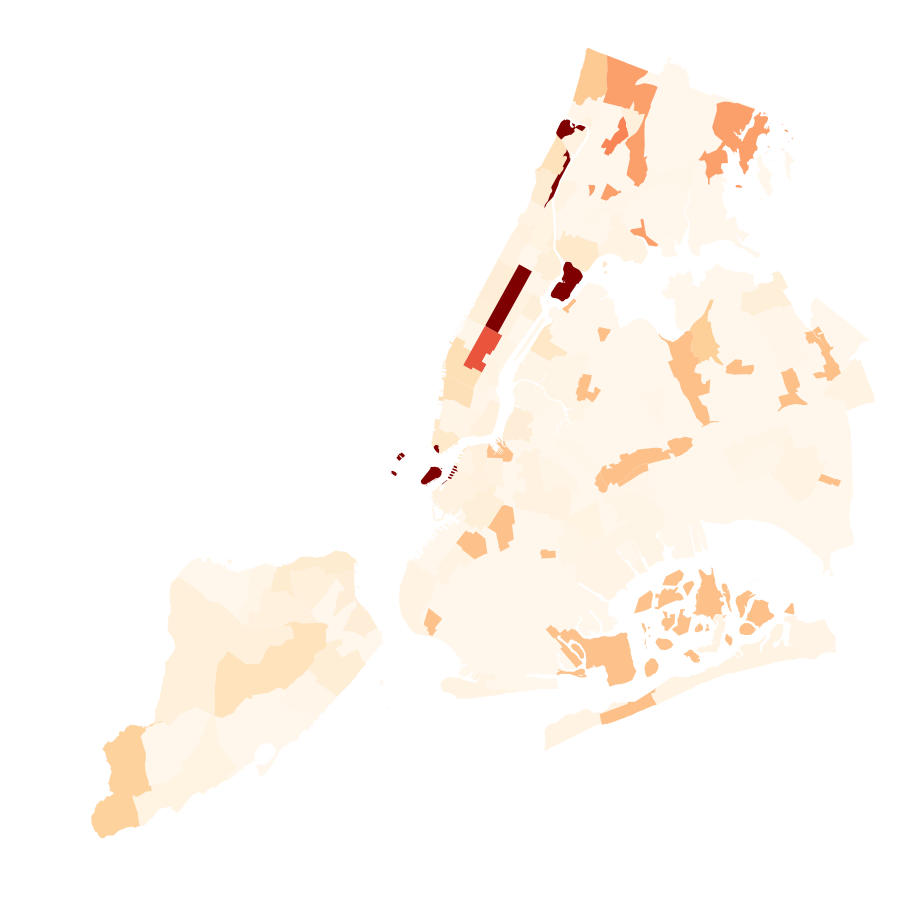

In [103]:
parks.plot(color='green', markersize=4, figsize=(16,16))
plt.axis('off')
ntasjoin.plot('event_id', cmap='OrRd', figsize=(16,16));
plt.axis('off')

In [104]:
parks.head()

,GISPROPNUM,LOCATION,COMMUNITYB,COUNCILDIS,PRECINCT,ZIPCODE,BOROUGH,ACRES,ADDRESS,SIGNNAME,TYPECATEGO,WATERFRONT,NYS_ASSEMB,NYS_SENATE,US_CONGRES,geometry
SIGNNAME,,,,,,,,,,,,,,,,
Queensbridge Park,Q104,"Queensboro Bridge, 41 Rd., 40 Ave. bet. The Ea...","401, 402",26,114,11101,Q,20.340,40-50 VERNON BOULEVARD,Queensbridge Park,Community Park,Yes,37,12,12,"(POLYGON ((998639.7287544757 214672.844326064,..."
Ambrosini Field,X253,City Island Ave bet. Centre St. and Winter St.,210,13,45,10464,X,6.100,200 CITY ISLAND AV,Ambrosini Field,Recreation Field/Courts,Yes,82,34,14,"POLYGON ((1044445.201119721 246876.5331993997,..."
Socrates Sculpture Park,Q465,Vernon Blvd. bet. Broadway and 30 Dr.,401,26,114,11106,Q,6.280,31-30 VERNON BOULEVARD,Socrates Sculpture Park,Neighborhood Park,Yes,37,12,12,(POLYGON ((1001424.035193726 219381.8155511469...
Coney Island Creek Park,B379,Bay View Ave. between Sea Gate Ave. and W. 33 St.,313,47,60,11224,B,8.892,3871 POLAR STREET,Coney Island Creek Park,Nature Area,Yes,46,23,8,"POLYGON ((983100.1226946414 150961.9117088169,..."
WNYC Transmitter Park,B385,West St. bet. Kent St. and Greenpoint Ave.,301,33,94,11222,B,6.611,2 KENT STREET,WNYC Transmitter Park,Neighborhood Park,Yes,50,26,12,"POLYGON ((994946.7417178899 205354.211716637, ..."


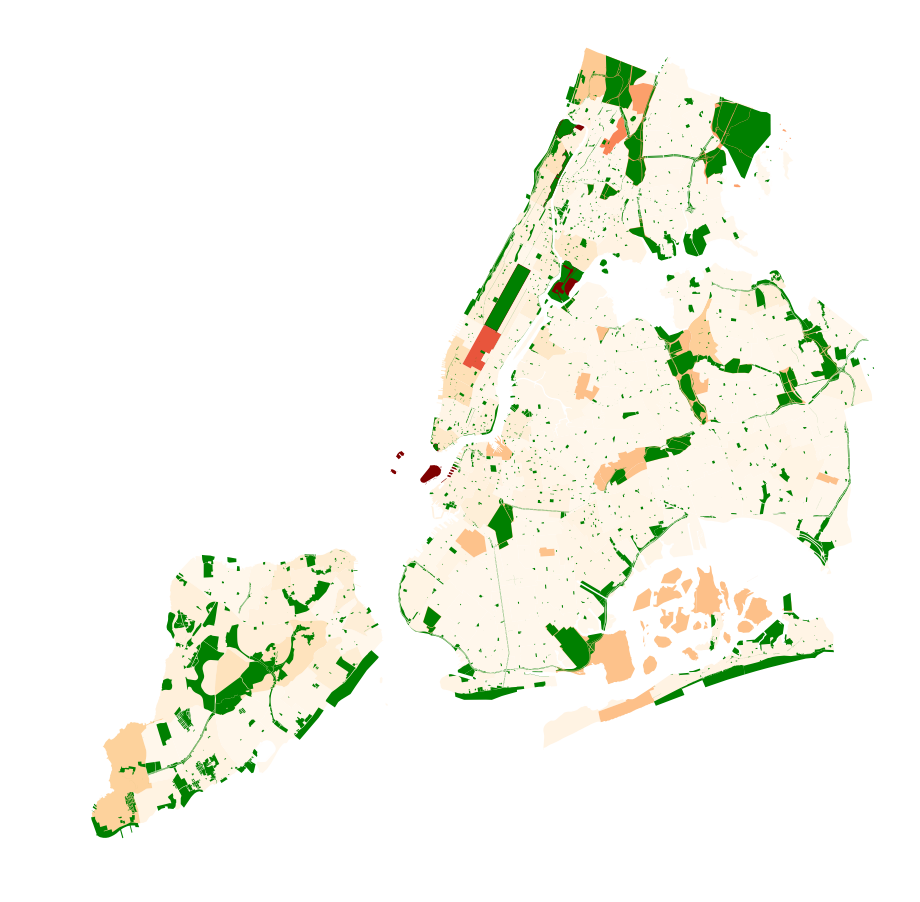

In [105]:
base = ntasjoin.plot('event_id', cmap='OrRd',figsize=(16,16))
parks.plot(ax=base,color='green')
plt.axis('off')
plt.show();

In [106]:
event2263.shape

(74880, 24)

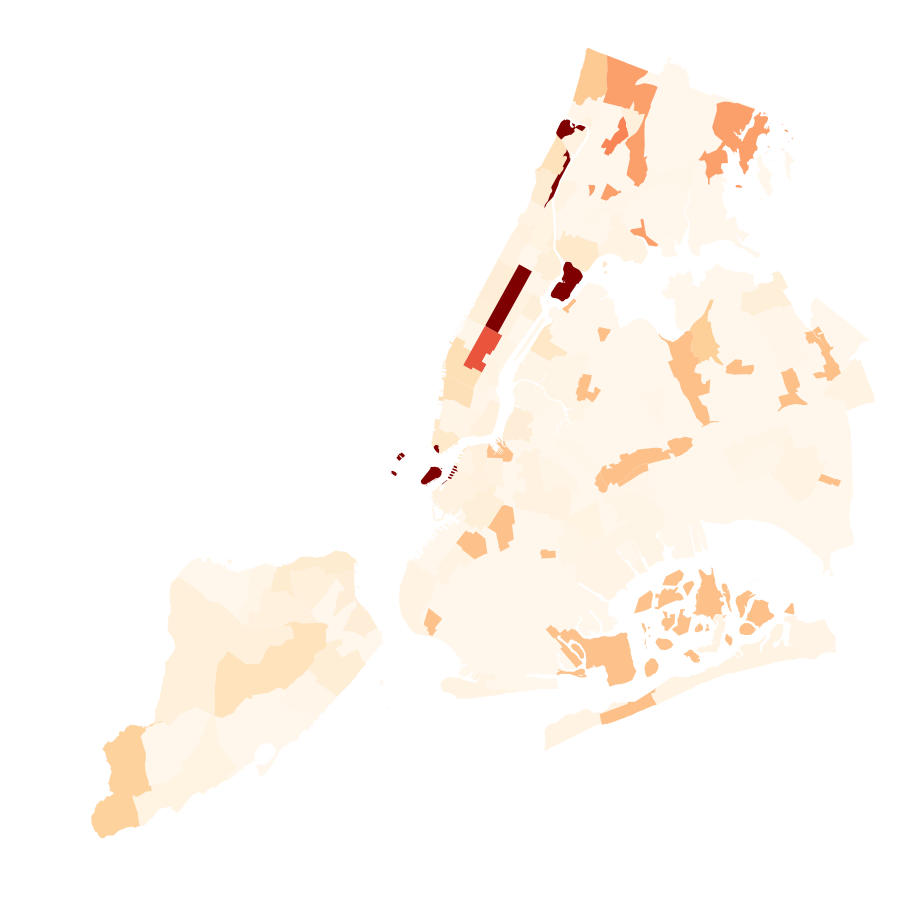

In [107]:
ntasjoin.plot('event_id', cmap='OrRd', figsize=(16,16))
plt.axis('off');

In [108]:
noduplevent= event2263[~event2263['event_id'].duplicated()]
noduplevent.shape

(74880, 24)

In [109]:
len(event2263['event_id'].unique().tolist())

74880

In [110]:
event2263.head()

,event_id,title,date,start_time,end_time,location_description,description,snippet,phone,email,...,notice,name,park_id,lat,long,address,zip,borough,accessible,geometry
0,76690,Open Hours: Hallett Nature Sanctuary,2013-10-29,13:00,15:00,NaN,Normally closed to visitors except on guided t...,Normally closed to visitors except on guided t...,(212) 360-1461,hlook@centralparknyc.org,...,0,Hallett Nature Sanctuary,M010,40.765701,-73.976097,NaN,NaN,M,1.0,POINT (990871.2821305585 218243.2837263702)
1,149886,Paper Arts and Crafts,2017-08-19,14:00,15:30,NaN,"<p>Make beautiful, fun things out of paper to ...","Make beautiful, fun things out of paper to giv...",(718) 365-5516,Lucy.Aponte@parks.nyc.gov,...,0,Poe Park Visitor Center,X040,40.865002,-73.894699,2640 Grand Concourse,NaN,X,1.0,POINT (1013375.649317923 254438.582607902)
2,143835,It's My Park at Herbert Von King Park - Spring...,2017-04-22,08:00,12:00,NaN,<p>Please note: this event time was originally...,Volunteers will spruce up playground equipment...,(917) 297-2365,wmdkaos@aol.com,...,0,Herbert Von King Cultural Arts Center,B088,40.689899,-73.946701,670 Lafayette Avenue,11216.0,B,1.0,POINT (999031.0151938059 190629.9053739559)
3,162696,Summer on the Hudson: Yoga Flow,2018-08-30,18:30,19:30,NaN,<p>Link mindful breath with movement in this f...,Link mindful breath with movement in this full...,311,summeronthehudson@gmail.com,...,0,Lawn at 74th Street,M353,40.781961,-73.985494,NaN,NaN,M,1.0,POINT (988267.384874076 224166.7720662239)
4,164892,It's My Park at William Sheridan Playground,2018-05-06,10:00,14:00,NaN,"<p>This It&#39;s My Park season, volunteer wit...",Volunteer with Friends of William Sheridan to ...,NaN,delancey.nelson@parks.nyc.gov,...,0,William Sheridan Playground,B124,40.715062,-73.964118,NaN,NaN,B,NaN,POINT (994197.1683949503 199794.7780903989)


In [111]:
event2263['SIGNNAME']=event2263['name']
t= event2263.groupby(['borough','park_id']).agg({"event_id":'count'})

In [112]:
t.sort_values(['borough','event_id'])
t.rename(columns={'event_id':'Number of Events'},inplace=True)
t.head()

Number of Events
borough park_id                  
B       B001                    2
        B002                   16
        B003                   50
        B007                    6
        B008                   33

In [113]:
superparks= t[t['Number of Events']>100] #To calculate the super parks
parks.rename(columns={'GISPROPNUM':'park_id'},inplace=True)

In [114]:
parks.index= parks['park_id']
superparks.reset_index(inplace=True)

In [115]:
superparks.head()

,borough,park_id,Number of Events
0,B,B012,104
1,B,B018,173
2,B,B032,237
3,B,B040,270
4,B,B057,640


In [116]:
superjoin= superparks.join(parks,on='park_id',how='left',lsuffix='parks').sort_values('Number of Events',ascending=False)

In [117]:
#superjoin.drop('index',axis=1,inplace=True)

In [118]:
parks[parks['park_id']=='M399']

,park_id,LOCATION,COMMUNITYB,COUNCILDIS,PRECINCT,ZIPCODE,BOROUGH,ACRES,ADDRESS,SIGNNAME,TYPECATEGO,WATERFRONT,NYS_ASSEMB,NYS_SENATE,US_CONGRES,geometry
park_id,,,,,,,,,,,,,,,,
M399,M399,Hudson Blvd. bet. W. 36 St. and W. 33 St.,104,3,10,"10001, 10018",M,2.148,None,Bella Abzug Park,Neighborhood Park,No,75,"31, 27",10,(POLYGON ((984068.3074380606 214378.0276584774...


In [119]:
superjoin[['park_id','ORGANIZATI','SIGNNAME','Number of Events']]

KeyError: "['ORGANIZATI'] not in index"

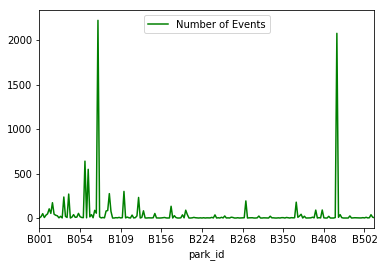

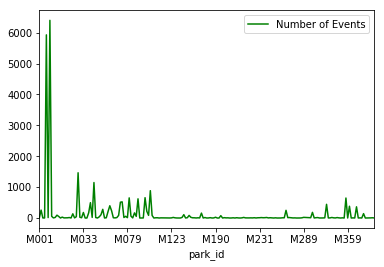

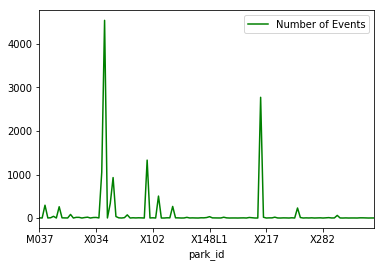

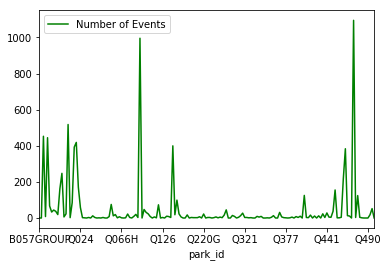

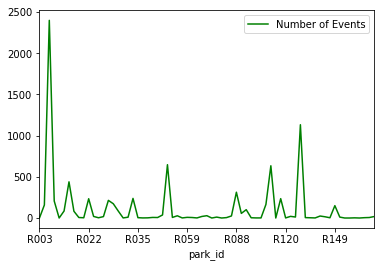

In [120]:
boroughs= ['B','M','X','Q','R']
for i in boroughs:
    t.loc[i].plot(color='green')
plt.show();

In [121]:
piep= t.groupby(['borough']).agg({"Number of Events":'sum'})

piep['y']=piep.index

piep.head()

,Number of Events,y
borough,,
B,9852,B
M,26238,M
Q,7976,Q
R,8199,R
X,13307,X


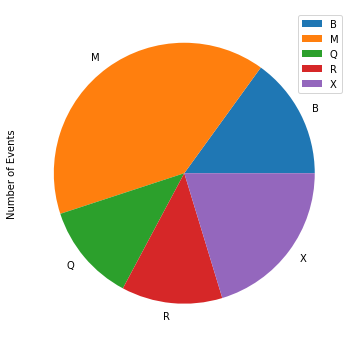

In [122]:
piep.plot.pie(y=0,figsize=(6,6));

In [123]:
piep

,Number of Events,y
borough,,
B,9852,B
M,26238,M
Q,7976,Q
R,8199,R
X,13307,X


In [124]:
#Population as of 2018
perboroughpop= [2582830,1628701,2278906,476179,1432132]
totalp= 8398748
perboroughpop= [x/totalp for x in perboroughpop]

In [125]:
piep['Percentage of Total Events']= piep['Number of Events']/piep['Number of Events'].sum()
piep
piep2= piep.reset_index()

In [126]:
piep2

,borough,Number of Events,y,Percentage of Total Events
0,B,9852,B,0.150247
1,M,26238,M,0.400140
2,Q,7976,Q,0.121637
3,R,8199,R,0.125038
4,X,13307,X,0.202937


In [127]:
perbseries= pd.Series(perboroughpop)
piep2['popshare']=perbseries
piep2['Comparison']= piep2['Percentage of Total Events']-piep2['popshare']
piep2.rename(columns={'event_id':'Number of Events'})
piep2

,borough,Number of Events,y,Percentage of Total Events,popshare,Comparison
0,B,9852,B,0.150247,0.307526,-0.157279
1,M,26238,M,0.400140,0.193922,0.206218
2,Q,7976,Q,0.121637,0.271339,-0.149701
3,R,8199,R,0.125038,0.056696,0.068342
4,X,13307,X,0.202937,0.170517,0.032420


In [128]:
piep3= piep2[['borough','Comparison']]

In [129]:
piep3.index= piep3['borough']
piep3.drop('borough',axis=1)

,Comparison
borough,
B,-0.157279
M,0.206218
Q,-0.149701
R,0.068342
X,0.032420


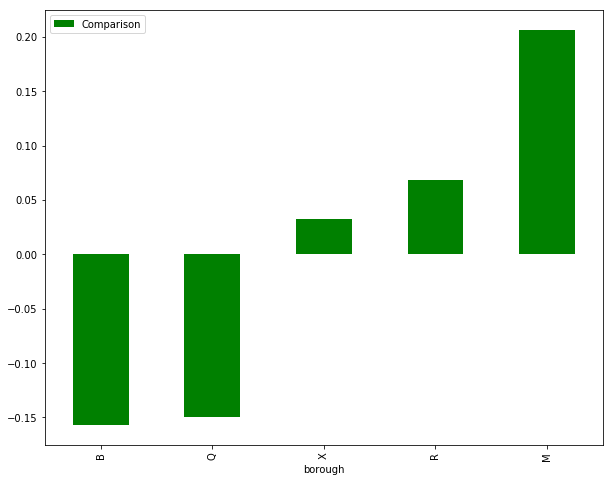

In [130]:
piep3.sort_values('Comparison').plot(kind='bar',color='green')
fig= plt.gcf()
fig.set_size_inches(10,8)
plt.savefig(join(graph_path,'comp_popandevents.pdf'));

In [131]:
event2263.head()

,event_id,title,date,start_time,end_time,location_description,description,snippet,phone,email,...,name,park_id,lat,long,address,zip,borough,accessible,geometry,SIGNNAME
0,76690,Open Hours: Hallett Nature Sanctuary,2013-10-29,13:00,15:00,NaN,Normally closed to visitors except on guided t...,Normally closed to visitors except on guided t...,(212) 360-1461,hlook@centralparknyc.org,...,Hallett Nature Sanctuary,M010,40.765701,-73.976097,NaN,NaN,M,1.0,POINT (990871.2821305585 218243.2837263702),Hallett Nature Sanctuary
1,149886,Paper Arts and Crafts,2017-08-19,14:00,15:30,NaN,"<p>Make beautiful, fun things out of paper to ...","Make beautiful, fun things out of paper to giv...",(718) 365-5516,Lucy.Aponte@parks.nyc.gov,...,Poe Park Visitor Center,X040,40.865002,-73.894699,2640 Grand Concourse,NaN,X,1.0,POINT (1013375.649317923 254438.582607902),Poe Park Visitor Center
2,143835,It's My Park at Herbert Von King Park - Spring...,2017-04-22,08:00,12:00,NaN,<p>Please note: this event time was originally...,Volunteers will spruce up playground equipment...,(917) 297-2365,wmdkaos@aol.com,...,Herbert Von King Cultural Arts Center,B088,40.689899,-73.946701,670 Lafayette Avenue,11216.0,B,1.0,POINT (999031.0151938059 190629.9053739559),Herbert Von King Cultural Arts Center
3,162696,Summer on the Hudson: Yoga Flow,2018-08-30,18:30,19:30,NaN,<p>Link mindful breath with movement in this f...,Link mindful breath with movement in this full...,311,summeronthehudson@gmail.com,...,Lawn at 74th Street,M353,40.781961,-73.985494,NaN,NaN,M,1.0,POINT (988267.384874076 224166.7720662239),Lawn at 74th Street
4,164892,It's My Park at William Sheridan Playground,2018-05-06,10:00,14:00,NaN,"<p>This It&#39;s My Park season, volunteer wit...",Volunteer with Friends of William Sheridan to ...,NaN,delancey.nelson@parks.nyc.gov,...,William Sheridan Playground,B124,40.715062,-73.964118,NaN,NaN,B,NaN,POINT (994197.1683949503 199794.7780903989),William Sheridan Playground


NameError: name 'tracts' is not defined